# Functions

## 1.&nbsp; Defining a function:

Creating a function is super easy. Just follow these steps:

- Start with the `def` statment.
- Give your function a name and open parentheses.
- Optional: write the names of your function's arguments between the parentheses.
- Write the code that performs whatever you want to do between parentheses.

Below, we define a function to divide two numbers:

In [ ]:
def division_func(numerator, denominator):
    res = numerator / denominator
    return res

## 2.&nbsp; Calling the function

Unless specified otherwise, arguments are passed in order

In [ ]:
division_func(2, 4)

0.5

You can switch the order of the arguments by being explicit with them:

In [ ]:
division_func(numerator=4,
              denominator=2)

2.0

In [ ]:
division_func(denominator=4,
              numerator=2)

0.5

It might be ugly, but you can be explicit only with some of the arguments...

In [ ]:
division_func(4, denominator=2)

2.0

Seting a default value for an argument is possible:

In [ ]:
def division_func(numerator=4, denominator=2):
    res = numerator / denominator
    return res

Whenever **all** arguments of a function have default values, you can call it without specifying them:

In [ ]:
division_func()

2.0

Arguments are not restricted to an object type (we never declare the types of variables, arguments or return values)

In [ ]:
def addition_func(element1=4, element2=2):
    res = element1 + element2
    return res

In [ ]:
addition_func(2, 4)

6

In [ ]:
addition_func("hello", "there")

'hellothere'

What if we really want to constrain this `addition_func` to only admit integers?

Option 1: try to coerce inputs to integers:

In [ ]:
def addition_func(element1=4, element2=2):
    return int(element1)+int(element2)

Option 2: check for the `type` of the inputs:

In [ ]:
def product_integers(x, y):
    if type(x) == int and type(y) == int:
        return(x*y)
    else:
        return "Are you out of your mind? Only integers allowed!"

print(product_integers(8, 2))
print(product_integers(4, "a"))

16
Are you out of your mind? Only integers allowed!


Testing for types is not a common practice. Embrace python's flexibility!

The `return` statement allows us to store the output of the function in a variable:

In [ ]:
def addition_func(element1=4, element2=2):
    res = element1 + element2
    return res

In [ ]:
a = addition_func(2,3)

In [ ]:
a

5

What if we use print instead of return?

In [ ]:
def addition_func(element1=4, element2=2):
    res = element1 + element2
    print(res)

It may look like the behaviour is the same... But the output gets printed when we are just trying to assign it to a variable:

In [ ]:
b = addition_func(1,8)

9


And the variable has not actually stored the output:

In [ ]:
b

So, in general, use `return` in functions instead of `print()`!

## 3.&nbsp; Exercises:

### Exercise 1:

Build a function to filp coins. It should take as an argument how many coins to flip, and ouptut how many times the coin landed on heads.

Hint: use the module `random` inside of your function!

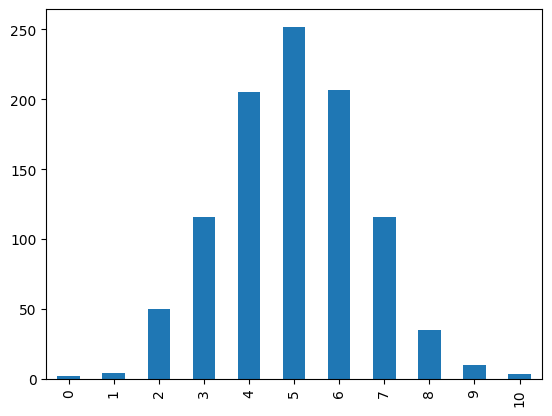

In [ ]:
import random
import pandas as pd
def flip_coins(n):
  return sum([ random.randint(0, 1) for _ in range(n) ])
pd.Series([flip_coins(10) for _ in range(1000)]).value_counts().sort_index().plot.bar();

### Exercise 2:

Build a function that takes as input a string and returns it reversed

Extra challenge: try not to use any built in Python string method!

In [ ]:
def reverse(s):
  return s if not s else s[-1] + reverse(s[0:-1])
reverse('reverse')

'esrever'

In [ ]:
def reverse(s):
  return ''.join([ s[-1-i] for i in range(len(s)) ])
reverse('reverse')

'esrever'

In [ ]:
def reverse(s):
  result = ''
  for c in s:
    result = c + result
  return result
reverse('reverse')

'esrever'

Test your function:

In [ ]:
reverse("Abracadabra")

# expected output: 'arbadacarbA'

'arbadacarbA'

### Exercise 3:

Build a function to return the intersection of two sets

Find out more about Python sets here: https://www.w3schools.com/python/python_sets.asp

In [ ]:
# Build a function to return the intersection of two sets
def intersect(a, b):
  return { x for x in a if x in b }

In [ ]:
def intersect(a, b):
  result = set()
  for x in a:
    if x in b:
      result.add(x)
  return result

In [ ]:
# test your function
small_primes = (1, 2, 3, 5, 7, 11, 13)
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13]

intersect(small_primes, fibonacci)

# expected output: {1, 2, 3, 5, 13}

{1, 2, 3, 5, 13}

In [ ]:
# Should work with strings as well
plane = "plane"
planet = "planet"

intersect(plane, planet)
# expected output: {"a", "e", "l", "n", "p"}

{'a', 'e', 'l', 'n', 'p'}

## 4.&nbsp; [BONUS] Modules

You can save a notebook as Python script (a file with the `.py` extension). Then, it automatically becomes a Python "module". These modules can be imported the same way you import `pandas`, and then you can access any functions within them.

This allows you to keep your functions in a clean and isolated place, where they will be less prone to getting "corrupted". Your notebook will also be cleaner without all the function definitions.

Using modules is easier when working locally (with Jupyter Lab, for example). If your `.py` file and your notebook are in the same folder, you can simply call `import my-module-name` from the notebook. With Google Colab, there's an extra step involved. Follow the instructions in [this video](https://www.youtube.com/watch?v=YP6APKLRf58).

**Exercise:** Convert the function from the previous exercise into a module and import it from another notebook.

In [86]:
with open('/content/module_challenge.py', 'w') as module:
  print('''\
def reverse(s):
  return s if not s else s[-1] + reverse(s[0:-1])

def intersect(a, b):
  return { x for x in a if x in b }
''', file=module)


In [93]:
import module_challenge
print(module_challenge.intersect('123456', '456789'))
print(module_challenge.reverse('456789'))

{'5', '6', '4'}
987654


## 5.&nbsp; [BONUS] Scopes

Let's look again at the `addition function`:

In [94]:
def addition_func(element1=4, element2=2):
    res = element1 + element2
    return res

#### where's the variable `res`?

It is a local variable: a name that is visible only to code inside the function def and that exists only while the function runs.

When you use a name in a program, Python creates, changes, or looks up the name in what is known as a namespace —a place where names live. When we talk about the search for a name’s value in relation to code, the term scope refers to a namespace: that is, the location of a name’s assignment in your source code determines the scope of the name’s visibility to your code.

The place where you assign a name in your source code determines the namespace it will live in, and hence its scope of visibility.

- Names assigned inside a def can only be seen by the code within that def. You cannot even refer to such names from outside the function.

- Names assigned inside a def do not clash with variables outside the def, even if the same names are used elsewhere. A name X assigned outside a given def (i.e., in a different def or at the top level of a module file) is a completely different variable from a name X assigned inside that def.

In [95]:
x = 1990

def func():
    x = 2020
    print(x)

In [96]:
func()

2020


In [97]:
x

1990

- If you need to assign a name that lives at the top level of the module enclosing the function, you can do so by declaring it in a global statement inside the function.

- If you need to assign a name that lives in an enclosing def, as of Python 3.X you can do so by declaring it in a nonlocal statement.

Type of assignment within a function classifies a name as local. This includes = statements, module names in import, function names in def, function argument names, and so on. If you assign a name in any way within a def, it will become a local to that function by default.

In-place changes to objects do not classify names as locals; only actual name assignments do.

For instance, if the name L is assigned to a list at the top level of a module, a statement L = X within a function will classify L as a local, but L.append(X) will not. In the latter case, we are changing the list object that L references, not L itself—L is found in the global scope as usual, and Python happily modifies it without requiring a global (or nonlocal) declaration. As usual, it helps to keep the distinction between names and objects clear: changing an object is not an assignment to a name.

In [101]:
L = [1, 2, 3]

def append4():
    L.append(4)
    return L

append4()

[1, 2, 3, 4]

In [102]:
L

[1, 2, 3, 4]

In [103]:
L = [1, 2, 3]

def transform_L_into_X():
    X = "This is X"
    L = X
    return L

transform_L_into_X()

'This is X'

In [104]:
L

[1, 2, 3]

#### The global statement

In [105]:
X = 88                         # Global X

def func():
    global X
    X = 99                     # Global X: outside def
    print(X)

func()

99


In [106]:
X

99

Minimize globals! What is the value of x here? It depends on where you ask during running time, and that's confusing and prone to errors.

Some more tips for using functions:

- each function should have a single, unified purpose.

- each function should be relatively small